# FRAUD TRANSACTION DETECTION 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_excel('veriseti.xlsx')

1.ADIM:
Veri İncelemesi ve Veri Temizliği

In [3]:
# Sütun adlarını yazdırma
print("Sütun Adları:")
print(df.columns.tolist())

# Sayısal sütunları belirleme
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

# Sayısal sütun adlarını yazdırma
print("\nSayısal Sütun Adları:")
print(numeric_columns)

# Toplam satır sayısını yazdırma
print("\nToplam Satır Sayısı:")
print(df.shape[0])

df.shape

Sütun Adları:
['PaymentTransactionID', 'Pan', 'TransactionType', 'CreateDate', 'TransactionStatus', 'Amount', 'TransactionRequestDate', 'TransactionResponseDate', 'CardBrandName', 'CardBankName', 'CardFamily', 'CardType']

Sayısal Sütun Adları:
['PaymentTransactionID', 'TransactionType', 'TransactionStatus']

Toplam Satır Sayısı:
1000


(1000, 12)

1.1 PaymentTransactionID sütununda eksik veri yok

1.2 Pan numarası eksik olan satırları sil

In [4]:
# Eksik PAN numaralarının sayısını yazdırma
missing_pan_count = df['Pan'].isna().sum()
print(f"PAN numarası eksik olan satır sayısı: {missing_pan_count}")

PAN numarası eksik olan satır sayısı: 46


In [5]:
df = df.dropna(subset=['Pan'])
df = df[df['Pan'].str.strip() != '']

1.3 CreateDate sütununu datetime formatına çevir

In [6]:
df['CreateDate'] = pd.to_datetime(df['CreateDate'],errors='coerce')
df['CreateDate']

0     2023-10-20 13:47:06.007
1     2023-10-20 13:44:17.000
2     2023-10-20 13:43:48.000
3     2023-10-20 13:43:19.000
4     2023-10-20 13:40:54.077
                ...          
994   2023-10-16 16:06:21.030
995   2023-10-16 16:05:47.000
996   2023-10-16 16:04:46.000
997   2023-10-16 15:57:05.000
999   2023-10-16 15:47:48.000
Name: CreateDate, Length: 954, dtype: datetime64[ns]

1.4 TransactionStatus sütununda 0(beklemede veya başarısız) ve 1(başarılı) formatında olsun

In [7]:
df['TransactionStatus'] = df['TransactionStatus'].apply(lambda x: 0 if x == 0 else (0 if x == 2 else 1))
print(df)

     PaymentTransactionID                  Pan  TransactionType  \
0                   35099     558460******5519                1   
1                   35098     526911******1733                1   
2                   35097     466282******0602                3   
3                   35096     411979******8898                1   
4                   35095     411979******8898                1   
..                    ...                  ...              ...   
994                 34045     529876******4768                1   
995                 34044     525864******6602                1   
996                 34043     411156******1485                3   
997                 34042  5526 4*********5177                2   
999                 34040     489455******1912                3   

                 CreateDate  TransactionStatus    Amount  \
0   2023-10-20 13:47:06.007                  1   9000.00   
1   2023-10-20 13:44:17.000                  0      0.60   
2   2023-10-20 

1.5 Amount sütununda sayısal olmayan değerleri tespit et, kaldır. 

In [8]:
# Sayısal veriye dönüştürme
df['Amount'] = df['Amount'].replace({'[^0-9.]': ''}, regex=True)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Sayısal olmayan değerlerin temizlenmesi
df = df.dropna(subset=['Amount'])

In [9]:
df.isnull().sum()

PaymentTransactionID         0
Pan                          0
TransactionType              0
CreateDate                   0
TransactionStatus            0
Amount                       0
TransactionRequestDate      24
TransactionResponseDate     24
CardBrandName               70
CardBankName                70
CardFamily                 229
CardType                    70
dtype: int64

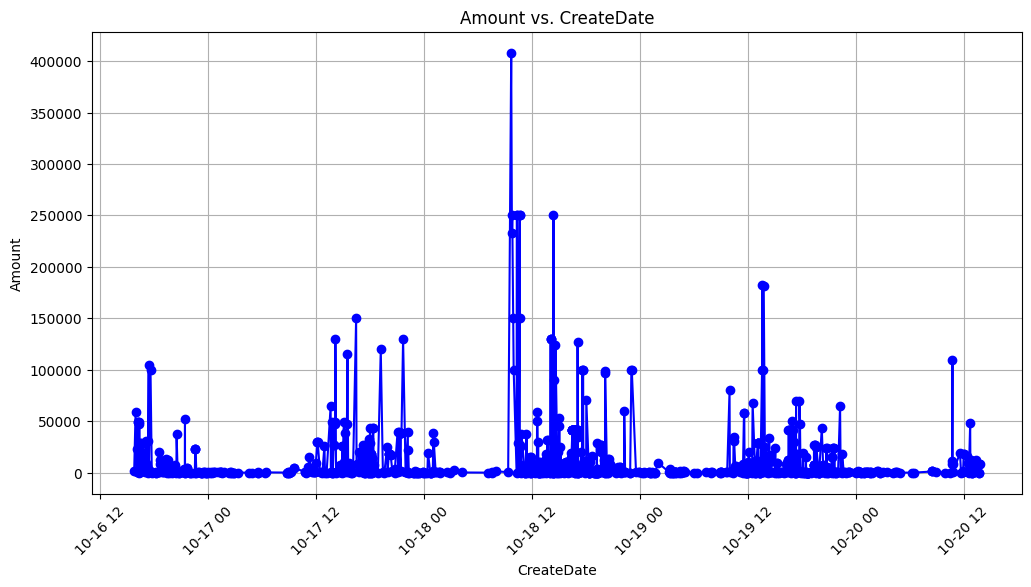

In [10]:
# CreateDate sütununu datetime formatına çevirin
df['CreateDate'] = pd.to_datetime(df['CreateDate'], format='%d/%m/%Y %H:%M')

# CreateDate'e göre sıralayın
df_sorted = df.sort_values(by='CreateDate')

# Grafik oluşturma
plt.figure(figsize=(12, 6))
plt.plot(df_sorted['CreateDate'], df_sorted['Amount'], marker='o', linestyle='-', color='b')
plt.xlabel('CreateDate')
plt.ylabel('Amount')
plt.title('Amount vs. CreateDate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

1.6 TransactionRequestDate sütununu datetime formatına çevir

In [11]:
df['TransactionRequestDate'] = pd.to_datetime(df['TransactionRequestDate'], errors='coerce')
df['TransactionRequestDate']

0     2023-10-20 13:47:07.000
1     2023-10-20 13:44:18.000
2     2023-10-20 13:43:49.000
3     2023-10-20 13:43:21.000
4     2023-10-20 13:40:55.000
                ...          
994   2023-10-16 16:06:22.043
995   2023-10-16 16:05:48.000
996   2023-10-16 16:04:48.000
997   2023-10-16 15:57:06.000
999   2023-10-16 15:47:49.000
Name: TransactionRequestDate, Length: 950, dtype: datetime64[ns]

In [12]:
# Boş olan TransactionRequestDate değerlerini filtreleme
missing_transaction_request_dates = df[df['TransactionRequestDate'].isna()]

In [13]:
# Boş olan TransactionRequestDate için CreateDate'e 1 saniye ekleme
df.loc[df['TransactionRequestDate'].isna(), 'TransactionRequestDate'] = df.loc[df['TransactionRequestDate'].isna(), 'CreateDate'] + pd.Timedelta(seconds=1)

In [14]:
# Güncellenmiş boş olan satırları kontrol etme
missing_transaction_request_dates_updated = df[df['TransactionRequestDate'].isna()]
print(missing_transaction_request_dates_updated)

Empty DataFrame
Columns: [PaymentTransactionID, Pan, TransactionType, CreateDate, TransactionStatus, Amount, TransactionRequestDate, TransactionResponseDate, CardBrandName, CardBankName, CardFamily, CardType]
Index: []


In [15]:
print(df['TransactionRequestDate'])

0     2023-10-20 13:47:07.000
1     2023-10-20 13:44:18.000
2     2023-10-20 13:43:49.000
3     2023-10-20 13:43:21.000
4     2023-10-20 13:40:55.000
                ...          
994   2023-10-16 16:06:22.043
995   2023-10-16 16:05:48.000
996   2023-10-16 16:04:48.000
997   2023-10-16 15:57:06.000
999   2023-10-16 15:47:49.000
Name: TransactionRequestDate, Length: 950, dtype: datetime64[ns]


1.7 TransactionresponseDate sütununu datetime formatına çevir

In [16]:
df['TransactionResponseDate'] = pd.to_datetime(df['TransactionResponseDate'], errors='coerce')
df['TransactionResponseDate']

0     2023-10-20 13:47:08.000
1     2023-10-20 13:44:19.000
2     2023-10-20 13:43:50.000
3     2023-10-20 13:43:22.000
4     2023-10-20 13:40:56.000
                ...          
994   2023-10-16 16:06:22.000
995   2023-10-16 16:05:49.000
996   2023-10-16 16:04:49.010
997   2023-10-16 15:57:07.000
999   2023-10-16 15:47:50.000
Name: TransactionResponseDate, Length: 950, dtype: datetime64[ns]

In [17]:
# Boş olan TransactionResponseDate değerlerini filtreleme
missing_transaction_request_dates = df[df['TransactionResponseDate'].isna()]

In [18]:
# Boş olan TransactionRequestDate için CreateDate'e 1 saniye ekleme
df.loc[df['TransactionResponseDate'].isna(), 'TransactionResponseDate'] = df.loc[df['TransactionResponseDate'].isna(), 'TransactionRequestDate'] + pd.Timedelta(seconds=1)

In [19]:
# NaN değerlerini kontrol etme
missing_transaction_response_dates_updated = df[df['TransactionResponseDate'].isna()]

# Sonuçları yazdırma
print(missing_transaction_response_dates_updated)

Empty DataFrame
Columns: [PaymentTransactionID, Pan, TransactionType, CreateDate, TransactionStatus, Amount, TransactionRequestDate, TransactionResponseDate, CardBrandName, CardBankName, CardFamily, CardType]
Index: []


In [20]:
print(df['TransactionResponseDate'])

0     2023-10-20 13:47:08.000
1     2023-10-20 13:44:19.000
2     2023-10-20 13:43:50.000
3     2023-10-20 13:43:22.000
4     2023-10-20 13:40:56.000
                ...          
994   2023-10-16 16:06:22.000
995   2023-10-16 16:05:49.000
996   2023-10-16 16:04:49.010
997   2023-10-16 15:57:07.000
999   2023-10-16 15:47:50.000
Name: TransactionResponseDate, Length: 950, dtype: datetime64[ns]


1.7 CardBrandName 

1.7.1 CardBrandName sütununu analiz et,boşlukları doldur

In [21]:
# Boş değerlerin olup olmadığını kontrol edin
print("Boş değerler öncesi:")
print(df['CardBrandName'].isna().sum())

# Eksik değer içeren satırları sil
df = df.dropna(subset=['CardBrandName'])

# Sonuçları kontrol edin
print("\nBoş değerler sonrası:")
print(df['CardBrandName'])

Boş değerler öncesi:
70

Boş değerler sonrası:
0      MASTERCARD
1      MASTERCARD
2            VISA
3            VISA
4            VISA
          ...    
993    MASTERCARD
994    MASTERCARD
995    MASTERCARD
996          VISA
999          VISA
Name: CardBrandName, Length: 880, dtype: object


1.7.2 CardBrandName sütunundaki kart markalarının frekanslarını hesaplama

In [22]:
brand_counts = df['CardBrandName'].value_counts()
print(brand_counts)

CardBrandName
MASTERCARD    518
VISA          340
TROY           21
AMEX            1
Name: count, dtype: int64


1.7.3 CardBrandName sütunu görselleştirme

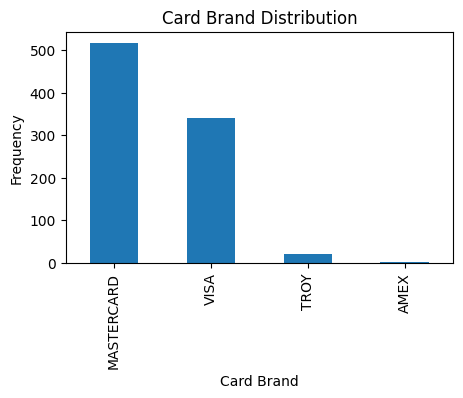

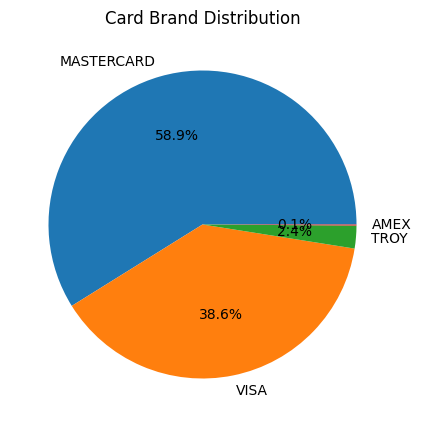

In [23]:
# Bar grafiği
plt.figure(figsize=(5, 3))
brand_counts.plot(kind='bar')
plt.title('Card Brand Distribution')
plt.xlabel('Card Brand')
plt.ylabel('Frequency')
plt.show()

# Pasta grafiği
plt.figure(figsize=(5, 5))
brand_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Card Brand Distribution')
plt.ylabel('')
plt.show()

1.7.4 Kart markalarına göre sahtekarlık oranı

In [24]:
# Her kart markası için TransactionStatus dağılımını kontrol edin
for brand in df['CardBrandName'].unique():
    print(f"\n{brand} markası için TransactionStatus dağılımı:")
    print(df[df['CardBrandName'] == brand]['TransactionStatus'].value_counts())


MASTERCARD markası için TransactionStatus dağılımı:
TransactionStatus
0    325
1    193
Name: count, dtype: int64

VISA markası için TransactionStatus dağılımı:
TransactionStatus
0    202
1    138
Name: count, dtype: int64

TROY markası için TransactionStatus dağılımı:
TransactionStatus
0    15
1     6
Name: count, dtype: int64

AMEX markası için TransactionStatus dağılımı:
TransactionStatus
0    1
Name: count, dtype: int64


In [25]:
fraud_by_brand = df.groupby('CardBrandName')['TransactionStatus'].value_counts(normalize=True).unstack()
print(fraud_by_brand)

TransactionStatus         0         1
CardBrandName                        
AMEX               1.000000       NaN
MASTERCARD         0.627413  0.372587
TROY               0.714286  0.285714
VISA               0.594118  0.405882


1.7.5 Kart markalarına göre ortalama işlem tutarları

In [26]:
amount_by_brand = df.groupby('CardBrandName')['Amount'].mean()
print(amount_by_brand)

CardBrandName
AMEX            325.000000
MASTERCARD    13873.769382
TROY          20501.585714
VISA           8923.455235
Name: Amount, dtype: float64


1.8 CardBankName

1.8.1 Banka isimlerinin frekanslarını hesaplama

In [27]:
bank_counts = df['CardBankName'].value_counts()
print(bank_counts)

CardBankName
T. GARANTİ BANKASI A.Ş.                           126
T.C.ZİRAAT BANKASI A.Ş.                           123
FİNANS BANK A.Ş.                                  118
AKBANK T.A.Ş.                                     114
YAPI VE KREDİ BANKASI A.Ş.                        112
T. İŞ BANKASI A.Ş.                                 89
T. VAKIFLAR BANKASI T.A.O.                         67
DENİZBANK A.Ş.                                     50
T.HALK BANKASI A.Ş.                                20
KUVEYT TÜRK KATILIM BANKASI A.Ş.                   16
TÜRK EKONOMİ BANKASI A.Ş.                          13
PAPARA ELEKTRONİK PARA HİZMETLERİ A.Ş              12
ŞEKERBANK T.A.Ş.                                    5
ING BANK A.Ş.                                       5
AKTİF YATIRIM BANKASI A.Ş.                          2
ALTERNATİF BANK A.Ş.                                1
İNİNAL ÖDEME VE ELEKTRONİK PARA HİZMETLERİ AŞ.      1
TÜRKİYE FİNANS KATILIM BANKASI A.Ş.                 1
HSBC BANK A.Ş. 

1.8.2 Banka isimlerinin frekanslarının görselleştirilmesi

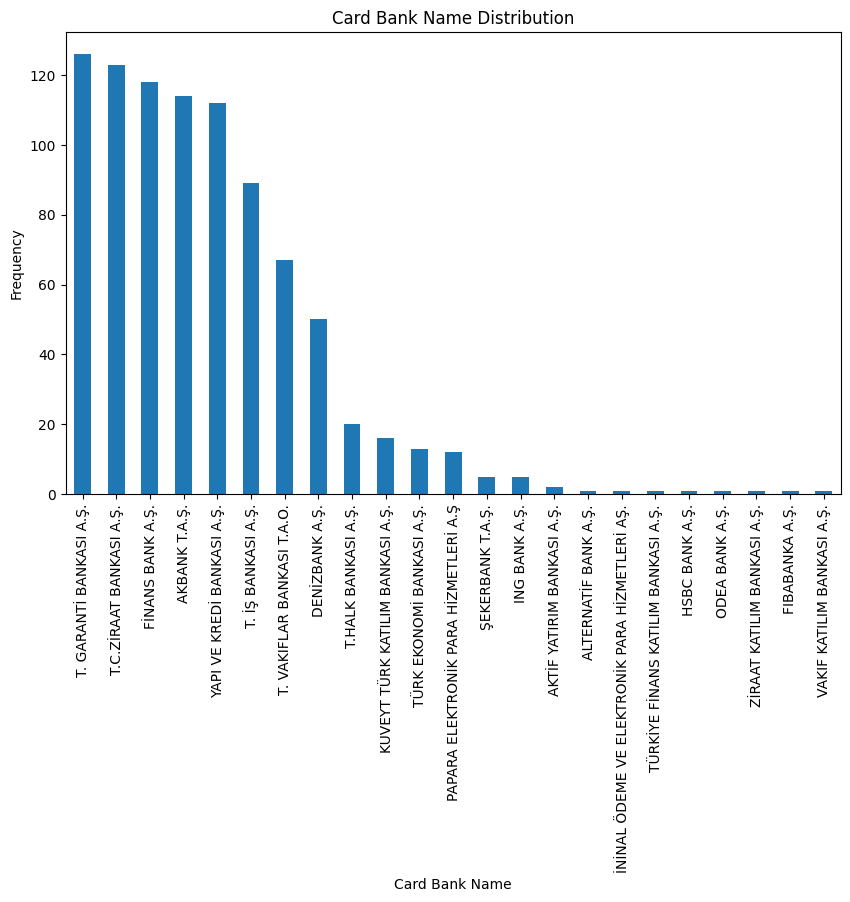

In [28]:
# Bar grafiği
plt.figure(figsize=(10, 6))
bank_counts.plot(kind='bar')
plt.title('Card Bank Name Distribution')
plt.xlabel('Card Bank Name')
plt.ylabel('Frequency')
plt.show()

1.8.3 Banka isimlerine göre sahtekarlık oranı

In [29]:
fraud_by_bank = df.groupby('CardBankName')['TransactionStatus'].value_counts(normalize=True).unstack()
print(fraud_by_bank)

TransactionStatus                                      0         1
CardBankName                                                      
AKBANK T.A.Ş.                                   0.622807  0.377193
AKTİF YATIRIM BANKASI A.Ş.                      0.500000  0.500000
ALTERNATİF BANK A.Ş.                                 NaN  1.000000
DENİZBANK A.Ş.                                  0.640000  0.360000
FIBABANKA A.Ş.                                       NaN  1.000000
FİNANS BANK A.Ş.                                0.661017  0.338983
HSBC BANK A.Ş.                                  1.000000       NaN
ING BANK A.Ş.                                   0.600000  0.400000
KUVEYT TÜRK KATILIM BANKASI A.Ş.                0.500000  0.500000
ODEA BANK A.Ş.                                  1.000000       NaN
PAPARA ELEKTRONİK PARA HİZMETLERİ A.Ş           0.666667  0.333333
T. GARANTİ BANKASI A.Ş.                         0.698413  0.301587
T. VAKIFLAR BANKASI T.A.O.                      0.611940  0.38

In [30]:
successful_transactions = df[df['TransactionStatus'] == 1]
failed_transactions = df[df['TransactionStatus'] == 0]

fraud_by_bank_success = successful_transactions.groupby('CardBankName')['TransactionStatus'].value_counts(normalize=True).unstack(fill_value=0)
fraud_by_bank_failed = failed_transactions.groupby('CardBankName')['TransactionStatus'].value_counts(normalize=True).unstack(fill_value=0)

print("Başarılı İşlemler:")
print(fraud_by_bank_success)
print("\nBaşarısız İşlemler:")
print(fraud_by_bank_failed)

Başarılı İşlemler:
TransactionStatus                        1
CardBankName                              
AKBANK T.A.Ş.                          1.0
AKTİF YATIRIM BANKASI A.Ş.             1.0
ALTERNATİF BANK A.Ş.                   1.0
DENİZBANK A.Ş.                         1.0
FIBABANKA A.Ş.                         1.0
FİNANS BANK A.Ş.                       1.0
ING BANK A.Ş.                          1.0
KUVEYT TÜRK KATILIM BANKASI A.Ş.       1.0
PAPARA ELEKTRONİK PARA HİZMETLERİ A.Ş  1.0
T. GARANTİ BANKASI A.Ş.                1.0
T. VAKIFLAR BANKASI T.A.O.             1.0
T. İŞ BANKASI A.Ş.                     1.0
T.C.ZİRAAT BANKASI A.Ş.                1.0
T.HALK BANKASI A.Ş.                    1.0
TÜRK EKONOMİ BANKASI A.Ş.              1.0
YAPI VE KREDİ BANKASI A.Ş.             1.0

Başarısız İşlemler:
TransactionStatus                                 0
CardBankName                                       
AKBANK T.A.Ş.                                   1.0
AKTİF YATIRIM BANKASI A.Ş.    

1.9 CardFamily

1.9.1 Kart ailelerinin frekanslarını hesaplama

In [31]:
family_counts = df['CardFamily'].value_counts()
print(family_counts)

CardFamily
Bonus         178
World         156
Axess         104
CardFinans    102
COMBO          79
Maximum        77
SAGLAMKART     12
PARAF          11
Combo           1
Advantage       1
Name: count, dtype: int64


In [32]:
#1.9.1 Kart ailelerinin frekanslarını görselleştirme

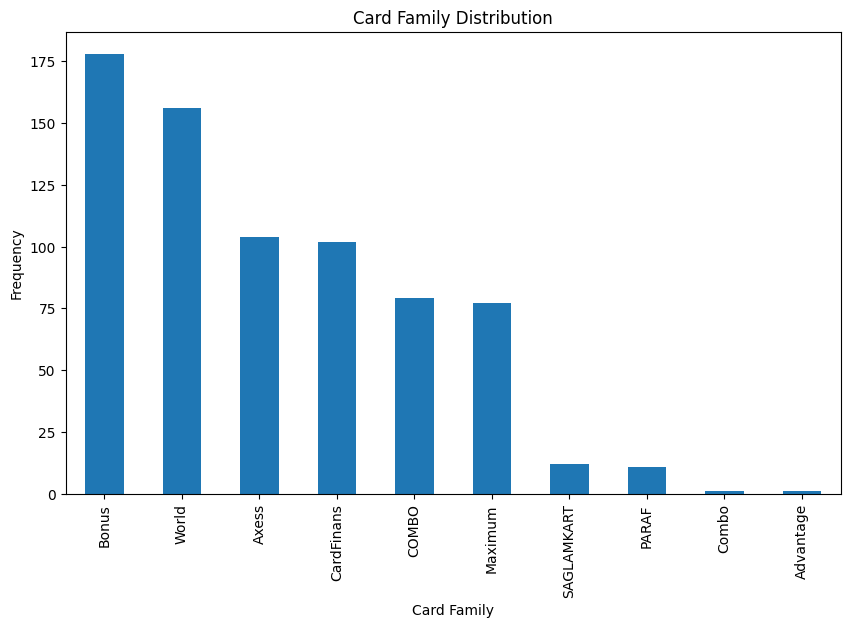

In [33]:
# Bar grafiği
plt.figure(figsize=(10, 6))
family_counts.plot(kind='bar')
plt.title('Card Family Distribution')
plt.xlabel('Card Family')
plt.ylabel('Frequency')
plt.show()

1.10 CardType

1.10.1 Kart türlerinin frekanslarını hesaplama

In [34]:
type_counts = df['CardType'].value_counts()
print(type_counts)

CardType
CREDIT          722
DEBIT           142
PREPAİD KART     16
Name: count, dtype: int64


In [35]:
# Boş değerleri "Unknown" ile doldurma

In [36]:
df.loc[(df['CardType'].notnull()) & (df['CardFamily'].isnull()), 'CardFamily'] = 'Unknown'

In [37]:
#1.10.2 Kart türlerinin frekanslarının görselleştirilmesi

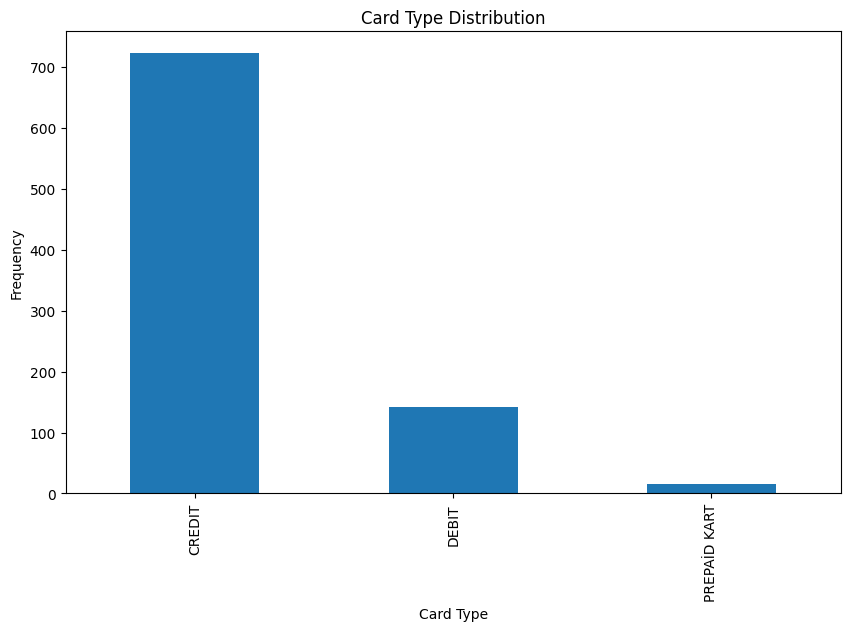

In [38]:
# Bar grafiği
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')
plt.title('Card Type Distribution')
plt.xlabel('Card Type')
plt.ylabel('Frequency')
plt.show()

In [39]:
df

,PaymentTransactionID,Pan,TransactionType,CreateDate,TransactionStatus,Amount,TransactionRequestDate,TransactionResponseDate,CardBrandName,CardBankName,CardFamily,CardType
0,35099,558460******5519,1,2023-10-20 13:47:06.007,1,9000.00,2023-10-20 13:47:07.000,2023-10-20 13:47:08.000,MASTERCARD,DENİZBANK A.Ş.,Bonus,CREDIT
1,35098,526911******1733,1,2023-10-20 13:44:17.000,0,0.60,2023-10-20 13:44:18.000,2023-10-20 13:44:19.000,MASTERCARD,FİNANS BANK A.Ş.,CardFinans,CREDIT
2,35097,466282******0602,3,2023-10-20 13:43:48.000,1,245.00,2023-10-20 13:43:49.000,2023-10-20 13:43:50.000,VISA,ALTERNATİF BANK A.Ş.,Bonus,CREDIT
3,35096,411979******8898,1,2023-10-20 13:43:19.000,1,8500.00,2023-10-20 13:43:21.000,2023-10-20 13:43:22.000,VISA,T. VAKIFLAR BANKASI T.A.O.,World,CREDIT
4,35095,411979******8898,1,2023-10-20 13:40:54.077,1,8500.00,2023-10-20 13:40:55.000,2023-10-20 13:40:56.000,VISA,T. VAKIFLAR BANKASI T.A.O.,World,CREDIT
...,...,...,...,...,...,...,...,...,...,...,...,...
993,34046,531157******6631,1,2023-10-16 16:12:44.000,1,49472.30,2023-10-16 16:12:45.000,2023-10-16 16:12:46.000,MASTERCARD,FİNANS BANK A.Ş.,CardFinans,CREDIT
994,34045,529876******4768,1,2023-10-16 16:06:21.030,0,23578.51,2023-10-16 16:06:22.043,2023-10-16 16:06:22.000,MASTERCARD,DENİZBANK A.Ş.,Bonus,CREDIT
995,34044,525864******6602,1,2023-10-16 16:05:47.000,1,1100.00,2023-10-16 16:05:48.000,2023-10-16 16:05:49.000,MASTERCARD,YAPI VE KREDİ BANKASI A.Ş.,World,CREDIT
996,34043,411156******1485,3,2023-10-16 16:04:46.000,0,1275.00,2023-10-16 16:04:48.000,2023-10-16 16:04:49.010,VISA,ŞEKERBANK T.A.Ş.,Bonus,CREDIT


In [40]:
df.columns

Index(['PaymentTransactionID', 'Pan', 'TransactionType', 'CreateDate',
       'TransactionStatus', 'Amount', 'TransactionRequestDate',
       'TransactionResponseDate', 'CardBrandName', 'CardBankName',
       'CardFamily', 'CardType'],
      dtype='object')

2.ADIM

Veri Analizi  

2.1.Temel İstatistikler

In [41]:
df.describe(include='all')

,PaymentTransactionID,Pan,TransactionType,CreateDate,TransactionStatus,Amount,TransactionRequestDate,TransactionResponseDate,CardBrandName,CardBankName,CardFamily,CardType
count,880.000000,880,880.000000,880,880.000000,880.000000,880,880,880,880,880,880
unique,NaN,535,NaN,NaN,NaN,NaN,NaN,NaN,4,23,11,3
top,NaN,444677******6324,NaN,NaN,NaN,NaN,NaN,NaN,MASTERCARD,T. GARANTİ BANKASI A.Ş.,Bonus,CREDIT
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,518,126,178,722
mean,34559.275000,NaN,1.984091,2023-10-18 14:52:17.914604544,0.382955,12103.915477,2023-10-18 14:52:19.388642304,2023-10-18 14:52:20.311678720,NaN,NaN,NaN,NaN
min,34040.000000,NaN,1.000000,2023-10-16 15:47:48,0.000000,0.600000,2023-10-16 15:47:49,2023-10-16 15:47:50,NaN,NaN,NaN,NaN
25%,34297.750000,NaN,1.000000,2023-10-17 17:24:59.500000,0.000000,300.000000,2023-10-17 17:25:00.760750080,2023-10-17 17:25:01.500000,NaN,NaN,NaN,NaN
50%,34556.500000,NaN,1.000000,2023-10-18 16:30:37.036499968,0.000000,760.000000,2023-10-18 16:30:38.533500160,2023-10-18 16:30:39,NaN,NaN,NaN,NaN
75%,34823.250000,NaN,3.000000,2023-10-19 14:33:27.020000,1.000000,10454.835000,2023-10-19 14:33:28,2023-10-19 14:33:29,NaN,NaN,NaN,NaN
max,35099.000000,NaN,3.000000,2023-10-20 13:47:06.007000,1.000000,408000.000000,2023-10-20 13:47:07,2023-10-20 13:47:08,NaN,NaN,NaN,NaN


2.2.Veri türleri ve boş değerler

In [42]:
# Sütun veri türleri
print(df.dtypes)

# Boş değerlerin sayısı
df.isnull().sum()

PaymentTransactionID                int64
Pan                                object
TransactionType                     int64
CreateDate                 datetime64[ns]
TransactionStatus                   int64
Amount                            float64
TransactionRequestDate     datetime64[ns]
TransactionResponseDate    datetime64[ns]
CardBrandName                      object
CardBankName                       object
CardFamily                         object
CardType                           object
dtype: object


PaymentTransactionID       0
Pan                        0
TransactionType            0
CreateDate                 0
TransactionStatus          0
Amount                     0
TransactionRequestDate     0
TransactionResponseDate    0
CardBrandName              0
CardBankName               0
CardFamily                 0
CardType                   0
dtype: int64

2.2.1 Her Bir Sütun İçin Özelliklerin Dağılımı

Amount Sütunu

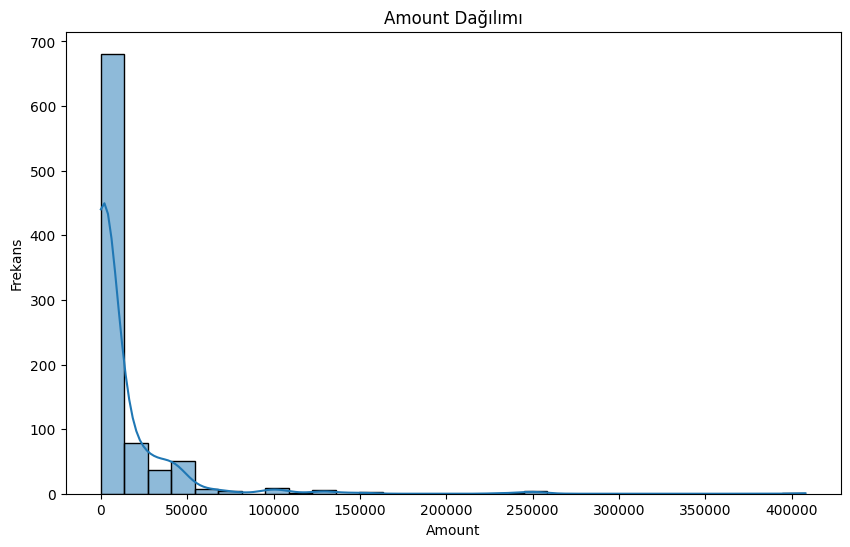

In [43]:
# Amount sütununun histogramı
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('Amount Dağılımı')
plt.xlabel('Amount')
plt.ylabel('Frekans')
plt.show()

TransactionStatus Sütunu

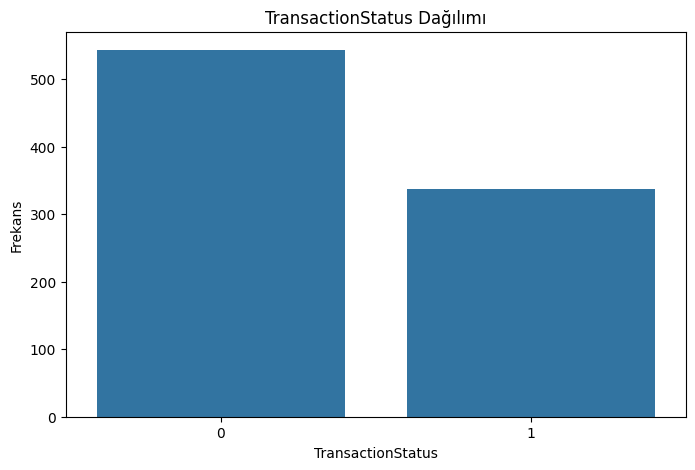

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='TransactionStatus', order=df['TransactionStatus'].value_counts().index)
plt.title('TransactionStatus Dağılımı')
plt.xlabel('TransactionStatus')
plt.ylabel('Frekans')
plt.show()

TransactionType Sütunu

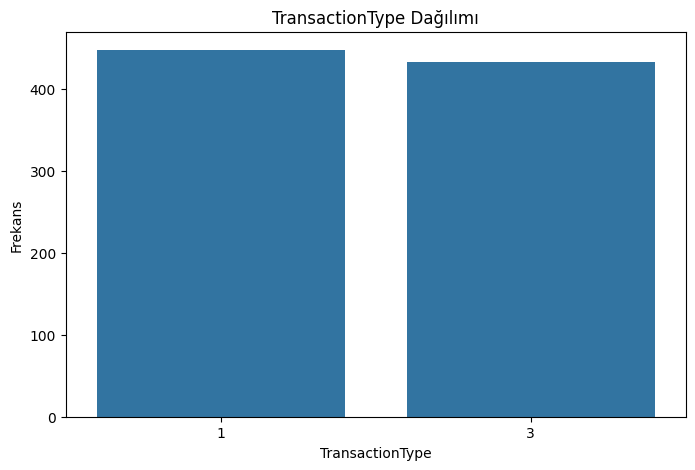

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='TransactionType', order=df['TransactionType'].value_counts().index)
plt.title('TransactionType Dağılımı')
plt.xlabel('TransactionType')
plt.ylabel('Frekans')
plt.show()

CardBrandName Sütunu

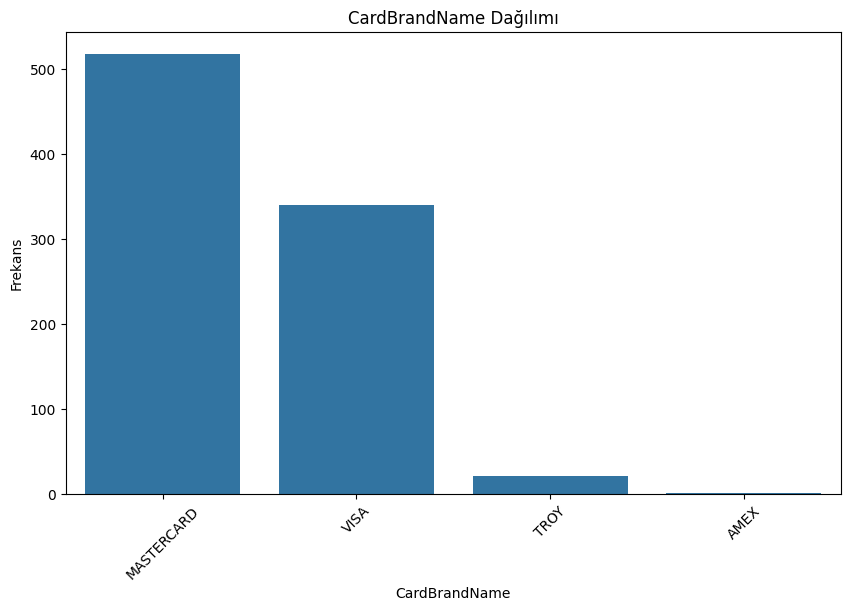

In [46]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CardBrandName', order=df['CardBrandName'].value_counts().index)
plt.title('CardBrandName Dağılımı')
plt.xlabel('CardBrandName')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.show()

CardBankName Sütunu

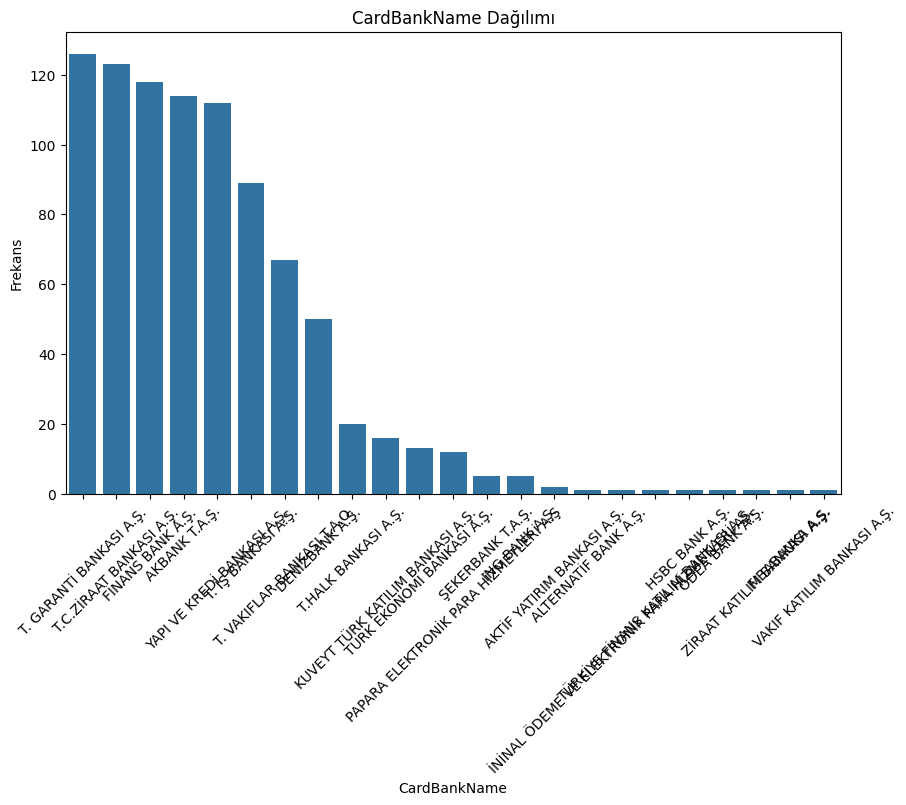

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CardBankName', order=df['CardBankName'].value_counts().index)
plt.title('CardBankName Dağılımı')
plt.xlabel('CardBankName')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.show()

CardFamily Sütunu

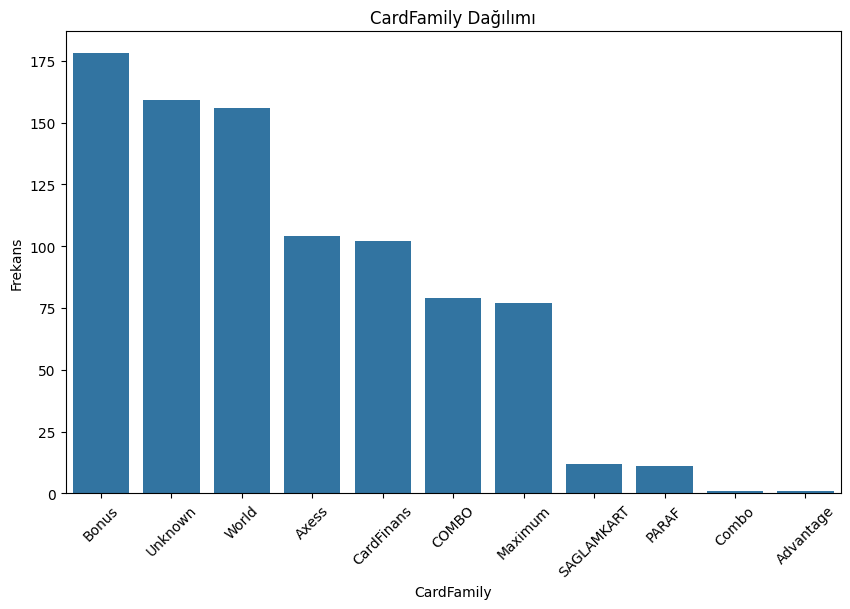

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CardFamily', order=df['CardFamily'].value_counts().index)
plt.title('CardFamily Dağılımı')
plt.xlabel('CardFamily')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.show()

CardType Sütunu

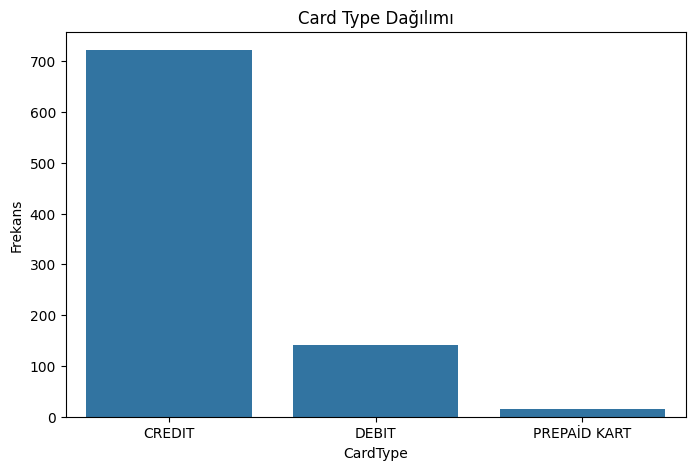

In [49]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='CardType', order=df['CardType'].value_counts().index)
plt.title('Card Type Dağılımı')
plt.xlabel('CardType')
plt.ylabel('Frekans')
plt.show()

CreateDate Sütunu

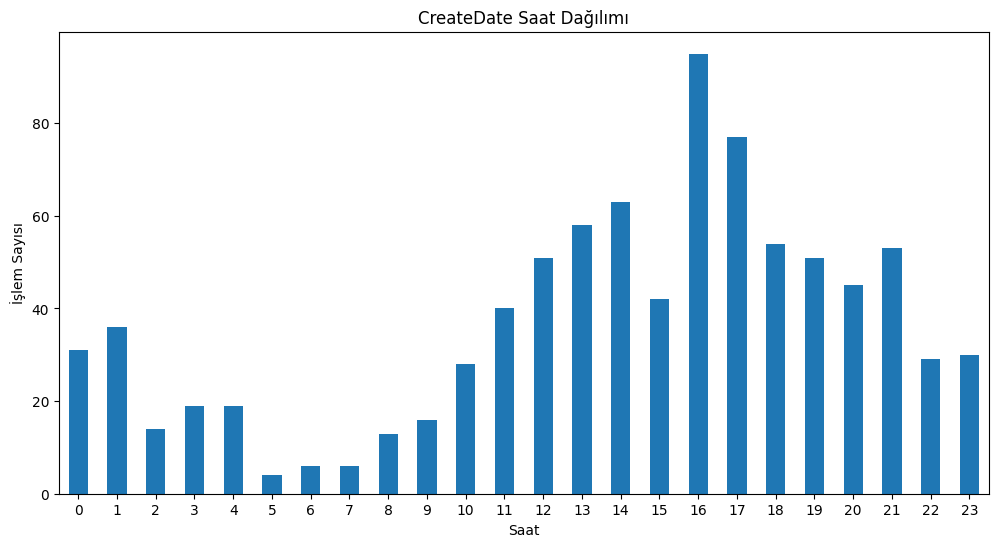

In [50]:
df['CreateDate'] = pd.to_datetime(df['CreateDate'], errors='coerce')

plt.figure(figsize=(12, 6))
df['CreateDate'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.title('CreateDate Saat Dağılımı')
plt.xlabel('Saat')
plt.ylabel('İşlem Sayısı')
plt.xticks(rotation=0)
plt.show()

TransactionRequestDate Sütunu

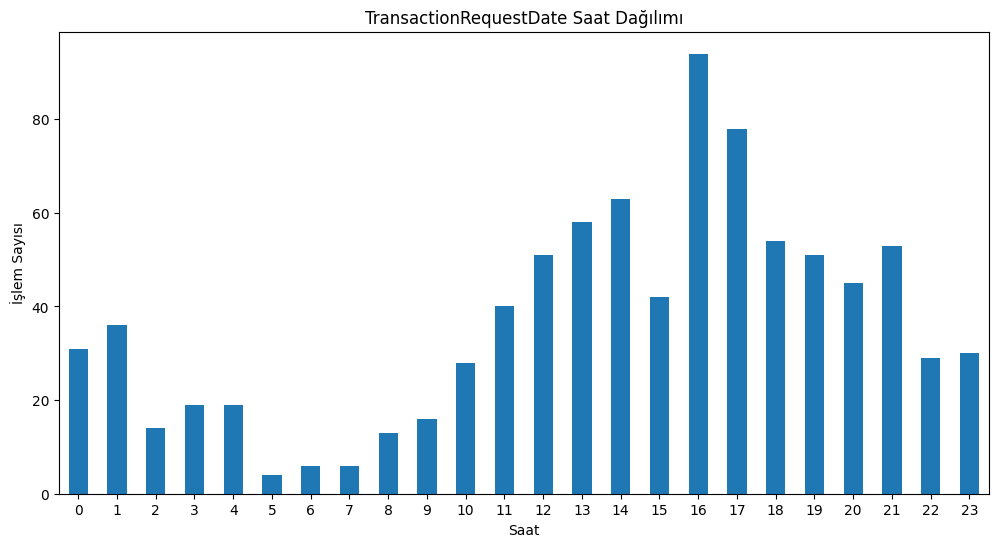

In [51]:
df['TransactionRequestDate'] = pd.to_datetime(df['TransactionRequestDate'], errors='coerce')

plt.figure(figsize=(12, 6))
df['TransactionRequestDate'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.title('TransactionRequestDate Saat Dağılımı')
plt.xlabel('Saat')
plt.ylabel('İşlem Sayısı')
plt.xticks(rotation=0)
plt.show()

TransactionResponseDate Sütunu

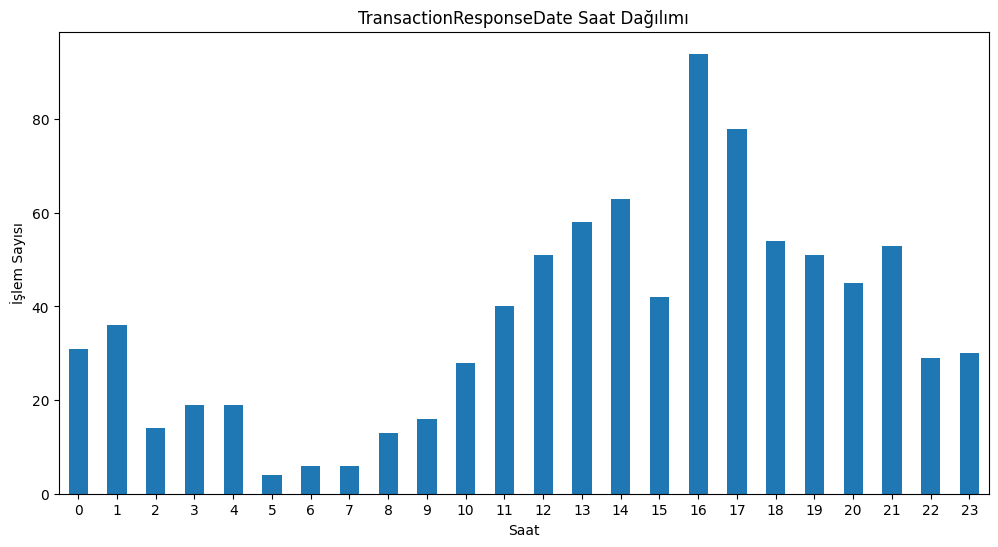

In [52]:
df['TransactionResponseDate'] = pd.to_datetime(df['TransactionResponseDate'], errors='coerce')

plt.figure(figsize=(12, 6))
df['TransactionResponseDate'].dt.hour.value_counts().sort_index().plot(kind='bar')
plt.title('TransactionResponseDate Saat Dağılımı')
plt.xlabel('Saat')
plt.ylabel('İşlem Sayısı')
plt.xticks(rotation=0)
plt.show()

2.3 Kategorik Verilerin Dağılımı

2.3.1 Kategorik Sütunların Frekans Dağılımı

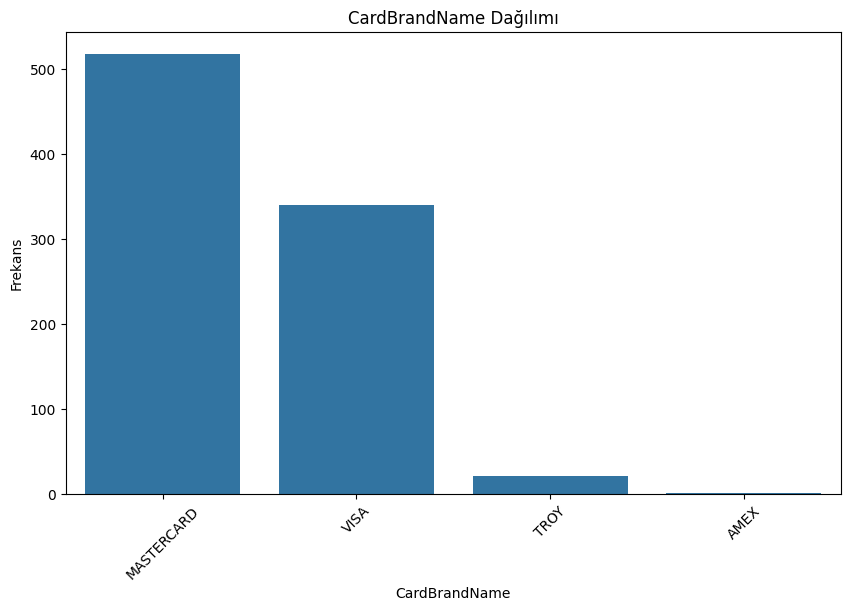

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CardBrandName', order=df['CardBrandName'].value_counts().index)
plt.title('CardBrandName Dağılımı')
plt.xlabel('CardBrandName')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.show()


2.3.2 Kategorik Sütunların Çiftler Halinde Dağılımı

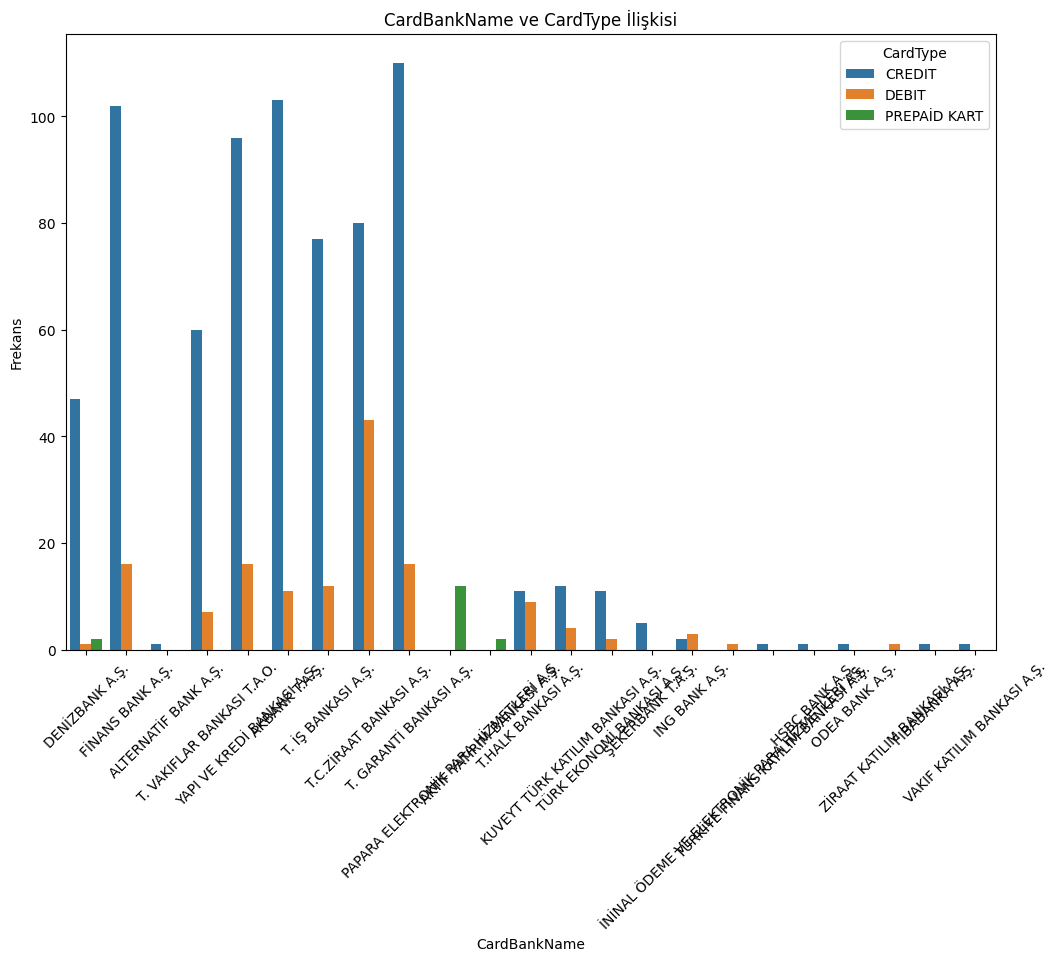

In [54]:
# CardType ve CardBankName ilişkisi
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='CardBankName', hue='CardType')
plt.title('CardBankName ve CardType İlişkisi')
plt.xlabel('CardBankName')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.legend(title='CardType')
plt.show()

2.4 Özelliklerin Özetlenmesi,Anomalilerin Belirlenmesi

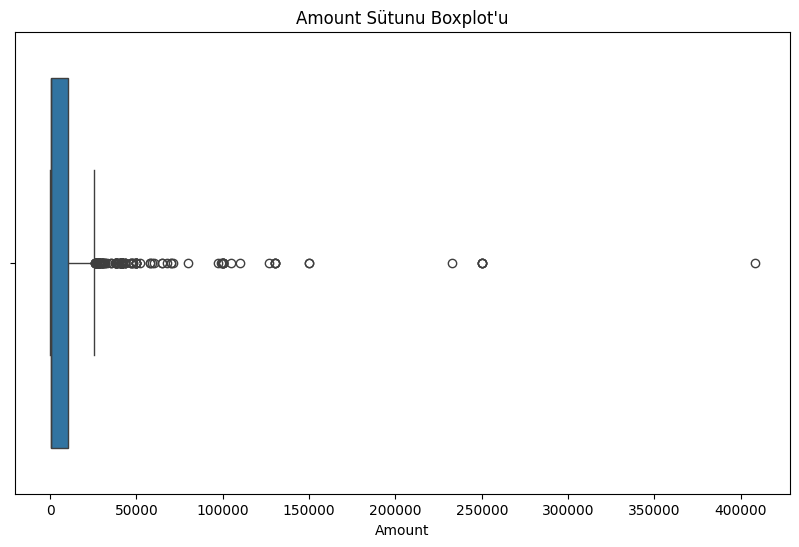

In [55]:
# Amount sütununun boxplot'u
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title('Amount Sütunu Boxplot\'u')
plt.xlabel('Amount')
plt.show()


#GRAFİKLER

In [56]:
#Başarısız İşlem Sayılarının Saatlik Dağılımı

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# `CreateDate` sütununu datetime formatına dönüştürün
df_extended['CreateDate'] = pd.to_datetime(df_extended['CreateDate'], errors='coerce', infer_datetime_format=True)

# Saatlik toplam işlem sayısını hesaplayın
hourly_total_transactions = df_extended.groupby(pd.Grouper(key='CreateDate', freq='1h')).size()

# Saatlik toplam işlem sayısını grafikle gösterin
plt.figure(figsize=(12, 6))
plt.plot(hourly_total_transactions.index, hourly_total_transactions.values, marker='o', linestyle='-', color='blue')

# Grafik etiketlerini ayarlayın
plt.xlabel('Tarih ve Saat')
plt.ylabel('Toplam İşlem Sayısı')
plt.title('Saatlik Toplam İşlem Sayıları')

# `x` eksenindeki tarih etiketlerinin formatını ayarlayın
plt.xticks(rotation=45, ha='right')

plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'df_extended' is not defined

In [ ]:
#Başarısız İşlem Sayısının Zaman İçindeki Trendi

In [ ]:
import matplotlib.pyplot as plt

# `CreateDate` sütununu datetime formatına dönüştürün
df_new['CreateDate'] = pd.to_datetime(df_new['CreateDate'])

# Başarısız işlemleri saatlik olarak gruplama
failed_transactions = df_new[df_new['TransactionStatus'] == 0]
hourly_failed_counts = failed_transactions.groupby(pd.Grouper(key='CreateDate', freq='1h')).size()

# Başarılı işlemleri saatlik olarak gruplama
successful_transactions = df_new[df_new['TransactionStatus'] == 1]
hourly_successful_counts = successful_transactions.groupby(pd.Grouper(key='CreateDate', freq='1h')).size()

# Grafik verilerini kontrol edin
print("Başarısız İşlemler:")
print(hourly_failed_counts.head())
print("Başarılı İşlemler:")
print(hourly_successful_counts.head())

# Grafiği oluşturma
plt.figure(figsize=(12, 6))

# Başarısız işlemleri grafikle gösterin
plt.plot(hourly_failed_counts.index, hourly_failed_counts.values, color='red', marker='o', label='Başarısız İşlemler')

# Başarılı işlemleri grafikle gösterin
plt.plot(hourly_successful_counts.index, hourly_successful_counts.values, color='green', marker='x', label='Başarılı İşlemler')

# Grafik etiketlerini ayarlayın
plt.xlabel('Tarih ve Saat')
plt.ylabel('İşlem Sayısı')
plt.title('Zaman Serisi - Saatlik Başarısız ve Başarılı İşlem Sayıları')

# Efsane (legend) ekleme
plt.legend()

# Tarih etiketlerini döndürme
plt.xticks(rotation=45)

# Grid ve layout ayarları
plt.grid(True)
plt.tight_layout()

# Grafiği gösterme
plt.show()


In [ ]:
#Grafikleri Gruplandırarak Gösterme

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Önce CreateDate sütununu datetime formatına dönüştür
df_extended['CreateDate'] = pd.to_datetime(df_extended['CreateDate'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

# PAN numarasına göre gruplama
grouped = df_extended.groupby('Pan')

# Filtrelenmiş veri saklama
filtered_data = []

# Her grubu kontrol etme ve veriyi toplama
for pan, group in grouped:
    if group['PaymentTransactionID'].nunique() >= 2:
        filtered_data.append((pan, group))

# Örnekleme yaparak sadece bazı PAN'lar için grafik oluşturma
sampled_filtered_data = filtered_data[:9]  # İlk 9 PAN'ı seçme, örneğin

# Grafik düzeni ayarlama
num_plots = len(sampled_filtered_data)
cols = 3  # Her satırda 3 grafik
rows = (num_plots // cols) + (num_plots % cols > 0)  # Satır sayısını hesaplama

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows), constrained_layout=True)

# Eğer sadece bir satır varsa axes'i düzleştir
if rows == 1:
    axes = axes.reshape(1, cols)

# Her grup için grafik oluşturma
for ax, (pan, group) in zip(axes.flatten(), sampled_filtered_data):
    sns.scatterplot(data=group, x='CreateDate', y='Amount', hue='PaymentTransactionID', palette='viridis', ax=ax)
    ax.set_title(f'PAN {pan}')
    ax.set_xlabel('CreateDate')
    ax.set_ylabel('Amount')
    ax.legend(title='PaymentTransactionID')
    ax.tick_params(axis='x', rotation=45)

# Boş olan eksenleri gizleme (eğer varsa)
for i in range(len(sampled_filtered_data), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])

# Grafikleri gösterme
plt.show()

In [ ]:
print(df.columns)

In [ ]:
df['Fraud']=0
df

3.ADIM

3. Veri Artırma

In [ ]:
import numpy as np
import pandas as pd

# Mevcut PAN numaralarını belirleyin
existing_pan_numbers = df['Pan'].unique()

# Rastgele veri oluşturma fonksiyonu
def generate_random_data(n):
    payment_transaction_ids = np.arange(df['PaymentTransactionID'].max() + 1, df['PaymentTransactionID'].max() + 1 + n)
    
    # Mevcut PAN numaralarından rastgele seçim yapın
    pan_numbers = np.random.choice(existing_pan_numbers, n)
    
    # TransactionType değerleri 1, 2 veya 3 olacak şekilde rastgele seçilir
    transaction_types = np.random.choice([1, 2, 3], n)
    
    # CreateDate 1 Ekim ve 10 Ekim arasında rastgele tarih ve saatler olacak
    start_date = pd.to_datetime('2023-10-01')
    end_date = pd.to_datetime('2023-10-21')
    create_dates = pd.to_datetime(np.random.uniform(start_date.value, end_date.value, n), unit='ns')
    
    # TransactionStatus değerleri 0 veya 1 olacak şekilde rastgele seçilir
    transaction_statuses = np.random.choice([0, 1], n)
    
    amounts = np.random.uniform(0, 400000, n)
    
    # Create transaction_request_dates 1 second after create_dates
    transaction_request_dates_dt = create_dates + pd.to_timedelta(1, unit='s')
    
    # Create transaction_response_dates 1 second after transaction_request_dates
    transaction_response_dates_dt = transaction_request_dates_dt + pd.to_timedelta(1, unit='s')
    
    # Tüm tarihleri istenilen formatta stringe dönüştür
    create_dates = create_dates.strftime('%Y/%m/%d %H:%M:%S')
    transaction_request_dates = transaction_request_dates_dt.strftime('%Y/%m/%d %H:%M:%S')
    transaction_response_dates = transaction_response_dates_dt.strftime('%Y/%m/%d %H:%M:%S')
    
    card_brands = np.random.choice(['VISA', 'MASTERCARD', 'TROY', 'AMEX'], n)
    
    card_banks = np.random.choice(['AKBANK T.A.Ş.', 'AKTİF YATIRIM BANKASI A.Ş.', 'ALTERNATİF BANK A.Ş.',
                                   'DENİZBANK A.Ş.','FIBABANKA A.Ş.','FİNANS BANK A.Ş.','HSBC BANK A.Ş.',
                                   'ING BANK A.Ş.','KUVEYT TÜRK KATILIM BANKASI A.Ş.','ODEA BANK A.Ş',
                                   'PAPARA ELEKTRONİK PARA HİZMETLERİ A.Ş','T. GARANTİ BANKASI A.Ş.',
                                   'T. VAKIFLAR BANKASI T.A.O.','T. İŞ BANKASI A.Ş.','T.C.ZİRAAT BANKASI A.Ş.',
                                   'T.HALK BANKASI A.Ş','TÜRK EKONOMİ BANKASI A.Ş.','TÜRKİYE FİNANS KATILIM BANKASI A.Ş.', 
                                   'TÜRKİYE FİNANS KATILIM BANKASI A.Ş.','Unknown ','VAKIF KATILIM BANKASI A.Ş.',
                                   'YAPI VE KREDİ BANKASI A.Ş.','ZİRAAT KATILIM BANKASI A.Ş','ŞEKERBANK T.A.Ş.',
                                   'İNİNAL ÖDEME VE ELEKTRONİK PARA HİZMETLERİ AŞ.'], n)
    
    
    card_types = np.random.choice(['CREDIT', 'DEBIT', 'PREPAID KART'], n)
    card_families = np.where(card_types == 'CREDIT', 
                             np.random.choice(['Bonus', 'World', 'Axess', 'CardFinans', 'COMBO', 'Maximum',
                                               'SAGLAMKART', 'PARAF', 'Combo', 'Advantage'], n),'Unknown')

    return pd.DataFrame({
        'PaymentTransactionID': payment_transaction_ids,
        'Pan': pan_numbers,
        'TransactionType': transaction_types,
        'CreateDate': create_dates,
        'TransactionStatus': transaction_statuses,
        'Amount': amounts,
        'TransactionRequestDate': transaction_request_dates,
        'TransactionResponseDate': transaction_response_dates,
        'CardBrandName': card_brands,
        'CardBankName': card_banks,
        'CardFamily': card_families,
        'CardType': card_types,
        'Fraud': 0
    })


# 5000 yeni satır oluştur
new_data = generate_random_data(15000)

# Orijinal veri çerçevesine yeni verileri ekle
df_extended = pd.concat([df, new_data], ignore_index=True)

# Sonuçları yazdır
# Sonuçları yazdır
print(f"Yeni veri çerçevesinin boyutu: {df_extended.shape}")

In [ ]:
print(df_extended.columns)

In [ ]:
# Yeni veri çerçevesinin boyutunu kontrol edin
print(df_extended.shape)

# İlk birkaç satırı inceleyin
df_extended

In [ ]:
import numpy as np
import pandas as pd

def create_synthetic_fraud_data(valid_data, num_synthetic):
    synthetic_fraud_list = []  # Listeyi tanımla

    for i in range(num_synthetic):
        sample = valid_data.sample(n=1, random_state=i)
        start_amount = sample['Amount'].values[0]
        
        # Tarih sütunlarını datetime formatına dönüştür
        create_date = pd.to_datetime(sample['CreateDate'].values[0])
        request_date = pd.to_datetime(sample['TransactionRequestDate'].values[0])
        response_date = pd.to_datetime(sample['TransactionResponseDate'].values[0])

        # İlk işlemi oluştur
        transactions = [{
            'Pan': sample['Pan'].values[0],
            'Amount': start_amount,
            'CreateDate': create_date,
            'TransactionRequestDate': request_date,
            'TransactionResponseDate': response_date,
            'TransactionStatus': sample['TransactionStatus'].values[0],
            'TransactionType': sample['TransactionType'].values[0],
            'CardBrandName': sample['CardBrandName'].values[0],
            'CardBankName': sample['CardBankName'].values[0],
            'CardFamily': sample['CardFamily'].values[0],
            'CardType': sample['CardType'].values[0],
            'Fraud': 0  # İlk işlem genellikle fraud olarak işaretlenmez
        }]

        # Rastgele sayıda deneme (3 ila 6 arasında)
        num_attempts = np.random.randint(3, 7)
        total_duration = 0

        # Azalan işlemleri oluştur
        for j in range(1, num_attempts):
            # Miktar azalışı (%10 ile %40 arasında)
            decrease_rate = np.random.uniform(0.1, 0.4)
            new_amount = transactions[-1]['Amount'] - (transactions[-1]['Amount'] * decrease_rate)

            # Tarih ve saat sapması (1 dakika ile 15 dakika arasında rastgele)
            time_delta = pd.Timedelta(minutes=np.random.uniform(1, 15))
            total_duration += time_delta.total_seconds() / 60  # Dakika olarak süre

            if total_duration > 60:
                break

            # Tarih ve saat hesaplamalarını yap
            last_date = transactions[-1]['CreateDate']
            new_date = last_date + time_delta

            # İşlem durumu (son işlem başarılı olur)
            status = 1 if j == (num_attempts - 1) else 0

            # Yeni işlem ekle
            transactions.append({
                'Pan': sample['Pan'].values[0],
                'Amount': new_amount,
                'CreateDate': new_date,
                'TransactionRequestDate': new_date + pd.Timedelta(seconds=1),
                'TransactionResponseDate': new_date + pd.Timedelta(seconds=2),
                'TransactionStatus': status,
                'TransactionType': sample['TransactionType'].values[0],
                'CardBrandName': sample['CardBrandName'].values[0],
                'CardBankName': sample['CardBankName'].values[0],
                'CardFamily': sample['CardFamily'].values[0],
                'CardType': sample['CardType'].values[0],
                'Fraud': 1 if status == 1 else 0  # Son başarılı işlem ve öncesi fraud olarak işaretlenir
            })

        synthetic_fraud_list.extend(transactions)  # Listeyi güncelle

    return pd.DataFrame(synthetic_fraud_list)

# Örnek kullanım
# valid_data: Orijinal veri çerçevesi (DataFrame)
# num_synthetic: Üretilecek sahte verilerin sayısı (örneğin 100)
num_synthetic = int(df_extended.shape[0] * 0.2)  # Burada üretilecek sahte veri sayısını belirtiyoruz
synthetic_fraud_data = create_synthetic_fraud_data(df_extended, num_synthetic)

df_new = pd.concat([df_extended, synthetic_fraud_data], ignore_index = True)
df_new

In [ ]:
df_new['Fraud'].value_counts()

In [ ]:
synthetic_fraud_data.shape

In [ ]:
df_new.info()

In [ ]:
#ADIM_4

In [ ]:
#Feature Engineering

In [ ]:
# CreateDate sütununu datetime formatına çevirme
df_new['CreateDate'] = pd.to_datetime(df_new['CreateDate'], errors='coerce')

# Zaman farkını hesaplama
df_new['TimeDifference'] = df_new.groupby('Pan')['CreateDate'].diff().dt.total_seconds().fillna(0)

# Miktar azalışını hesaplama
df_new['AmountDecrease'] = df_new.groupby('Pan')['Amount'].diff().fillna(0)

5.ADIM

5.1 Veri Setinin Bölünmesi

In [ ]:
from sklearn.model_selection import train_test_split

# Hedef değişken ve özellikleri belirleme
X = df_new[['TimeDifference', 'AmountDecrease', 'Amount', 'TransactionType']]
y = df_new['Fraud']  # Sahte işlemleri belirleyen etiket sütunu

# Veriyi eğitim ve test seti olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Veriyi ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

6.ADIM

In [ ]:
#MODELLEME

6.1 Model Seçimi

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import numpy as np

# Örneğin veri yükleme ve işleme
# X = df.drop(columns=['TransactionStatus'])
# y = df['TransactionStatus']

y = y-1 

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lojistik Regresyon modelini eğit ve değerlendir
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted', zero_division=0)
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted', zero_division=0)
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted', zero_division=0)

print(f"Logistic Regression  Accuracy: {accuracy_logistic}")
print(f"Logistic Regression  Precision: {precision_logistic}")
print(f"Logistic Regression  Recall: {recall_logistic}")
print(f"Logistic Regression F1 Score: {f1_logistic}")

# Random Forest modelini eğit ve değerlendir
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

print(f"Random Forest  Accuracy: {accuracy_rf}")
print(f"Random Forest  Precision: {precision_rf}")
print(f"Random Forest  Recall: {recall_rf}")
print(f"Random Forest F1 Score: {f1_rf}")


# Decision Tree modelini eğit ve değerlendir
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)
y_pred_dt = decision_tree_model.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted', zero_division=0)
recall_dt = recall_score(y_test, y_pred_dt, average='weighted', zero_division=0)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted', zero_division=0)

print(f"Decision Tree  Accuracy: {accuracy_dt}")
print(f"Decision Tree  Precision: {precision_dt}")
print(f"Decision Tree  Recall: {recall_dt}")
print(f"Decision Tree F1 Score: {f1_dt}")



# SVM modelini eğit ve değerlendir
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted', zero_division=0)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted', zero_division=0)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)

print(f"SVM  Accuracy: {accuracy_svm}")
print(f"SVM  Precision: {precision_svm}")
print(f"SVM  Recall: {recall_svm}")
print(f"SVM F1 Score: {f1_svm}")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import numpy as np

# Örneğin veri yükleme ve işleme
# X = df.drop(columns=['TransactionStatus'])
# y = df['TransactionStatus']

# y değerlerini 1 azaltarak etiketleri sıfırdan başlatıyoruz
y = y - 1

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veriyi ölçeklendir
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lojistik Regresyon modelini eğit ve değerlendir
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic, zero_division=0))

# Random Forest modelini eğit ve değerlendir
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_model.predict(X_test_scaled)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Decision Tree modelini eğit ve değerlendir
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)
y_pred_dt = decision_tree_model.predict(X_test_scaled)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, zero_division=0))

# SVM modelini eğit ve değerlendir
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, zero_division=0))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Model oluşturma
model = RandomForestClassifier(random_state=42)

# Modeli eğitme
model.fit(X_train_scaled, y_train)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix hesaplayın
cm = confusion_matrix(y_test, y_pred_rf)

# Görselleştirin
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
hiper

In [ ]:
cross validation moddle kısmınd ayap